In [366]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [367]:
url_1 = "https://jsonkeeper.com/b/LLQT"  
response = requests.get(url_1, verify = False)  

if response.status_code == 200:
    data = response.json()
    Quiz_data = pd.DataFrame(data).transpose()
else:tttt
    print('Print Failed to load')

In [371]:
Quiz_data = Quiz_data.transpose()

In [372]:
ques = Quiz_data['questions']

In [373]:
Ques_df = pd.json_normalize(ques)

In [374]:
Ques_df = Ques_df.transpose()

In [375]:
Ques_df.columns = ['questions']

In [376]:
Ques_df

,questions
0,"{'id': 1827, 'description': 'The tissue which ..."
1,"{'id': 1828, 'description': 'Epithelial tissue..."
2,"{'id': 1829, 'description': 'The ciliated colu..."
3,"{'id': 1830, 'description': 'The squamous epit..."
4,"{'id': 1831, 'description': 'The kind of epith..."
...,...
123,"{'id': 1960, 'description': 'Bone is a solid, ..."
124,"{'id': 1961, 'description': 'Neurons which con..."
125,"{'id': 1962, 'description': 'Which type of neu..."
126,"{'id': 1963, 'description': 'Mark the connecti..."


In [377]:
Ques_df = pd.json_normalize(Ques_df['questions'])

In [378]:
Ques_df.isnull().sum()

id                       0
description              0
difficulty_level       128
topic                    0
is_published             0
created_at               0
updated_at               0
detailed_solution        9
type                    65
is_mandatory             0
show_in_feed             0
pyq_label              123
topic_id                 0
reading_material_id      0
fixed_at               123
fix_summary            123
created_by             128
updated_by             123
quiz_level             128
question_from            0
language               128
photo_url              125
photo_solution_url     128
is_saved                 0
tag                      0
options                  0
dtype: int64

In [379]:
drop_columns = ['difficulty_level', 'pyq_label', 'fix_summary', 'created_by', 'updated_by', 'quiz_level', 'photo_solution_url', 'photo_url', 'language', 'fixed_at', 'type']
Ques_df = Ques_df.drop(drop_columns, axis = 1)

In [380]:
Ques_df

,id,description,topic,is_published,created_at,updated_at,detailed_solution,is_mandatory,show_in_feed,topic_id,reading_material_id,question_from,is_saved,tag,options
0,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,2024-07-02T12:43:34.360+05:30,2024-11-30T18:39:20.587+05:30,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,False,,"[{'id': 7321, 'description': 'Muscular tissue'..."
1,1828,Epithelial tissue is distinguished from connec...,structural organisation in animals,True,2024-07-02T12:50:56.100+05:30,2024-11-30T18:39:20.788+05:30,**Epithelial Tissue**\n\n* Epithelial tissue i...,False,False,146,2017,Q-bank,False,,"[{'id': 7325, 'description': 'large extracellu..."
2,1829,The ciliated columnar epithelial cells in huma...,structural organisation in animals,True,2024-07-02T12:54:25.824+05:30,2024-11-30T18:39:20.990+05:30,**Explanation:**\n\nCiliated columnar epitheli...,False,False,146,2018,Q-bank,False,,"[{'id': 7329, 'description': 'Eustachian tube ..."
3,1830,The squamous epithelium is found in,structural organisation in animals,True,2024-07-02T12:56:48.204+05:30,2024-11-30T18:39:21.192+05:30,**Explanation:**\n\nSquamous epithelium is a t...,False,False,146,2019,Q-bank,False,,"[{'id': 7333, 'description': 'stomach', 'quest..."
4,1831,The kind of epithelium which forms the inner w...,structural organisation in animals,True,2024-07-02T12:58:51.241+05:30,2024-11-30T18:39:21.398+05:30,**Answer is correct because:**\n\nSquamous epi...,False,False,146,2020,Q-bank,False,,"[{'id': 7337, 'description': 'cuboidal epithel..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1960,"Bone is a solid, rigid connective tissue. If t...",structural organisation in animals,True,2024-07-02T17:11:47.370+05:30,2024-11-30T18:39:45.927+05:30,Bone is a solid and rigid connective tissue th...,False,False,146,2139,Q-bank,False,,"[{'id': 7854, 'description': 'Become decalcifi..."
124,1961,Neurons which connect the central nervous syst...,structural organisation in animals,True,2024-07-02T17:11:47.389+05:30,2024-11-30T18:39:46.127+05:30,**Explanation:**\n\nSensory neurons are specia...,False,False,146,2140,Q-bank,False,,"[{'id': 7858, 'description': 'Sensory neurons'..."
125,1962,Which type of neuron dominates in the CNS ?,structural organisation in animals,True,2024-07-02T17:11:47.411+05:30,2024-11-30T18:39:46.333+05:30,**Explanation:**\n\nThe central nervous system...,False,False,146,2141,Q-bank,False,,"[{'id': 7862, 'description': 'Sensory', 'quest..."
126,1963,Mark the connective tissue which is without fi...,structural organisation in animals,True,2024-07-02T17:11:47.432+05:30,2024-11-30T18:39:46.537+05:30,**Explanation:**\n\nConnective tissues are a g...,False,False,146,2142,Q-bank,False,,"[{'id': 7866, 'description': 'Areolar tissue',..."


In [381]:
Ques_df['created_at'] = pd.to_datetime(Ques_df['created_at'])
Ques_df['created_date'] = Ques_df['created_at'].dt.date
Ques_df['created_time'] = Ques_df['created_at'].dt.floor('min').dt.time

Ques_df['updated_at'] = pd.to_datetime(Ques_df['updated_at'])
Ques_df['updated_date'] = Ques_df['updated_at'].dt.date
Ques_df['updated_time'] = Ques_df['updated_at'].dt.floor('min').dt.time

Ques_df = Ques_df.drop(['created_at', 'updated_at'], axis = 1)

In [382]:
Ques_df.columns = ['question_id', 'description', 'topic', 'is_published', 'detailed_solution',
       'is_mandatory', 'show_in_feed', 'topic_id', 'reading_material_id',
       'question_from', 'is_saved', 'tag', 'options', 'created_date',
       'created_time', 'updated_date', 'updated_time']

In [383]:
Ques_df

,question_id,description,topic,is_published,detailed_solution,is_mandatory,show_in_feed,topic_id,reading_material_id,question_from,is_saved,tag,options,created_date,created_time,updated_date,updated_time
0,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,False,,"[{'id': 7321, 'description': 'Muscular tissue'...",2024-07-02,12:43:00,2024-11-30,18:39:00
1,1828,Epithelial tissue is distinguished from connec...,structural organisation in animals,True,**Epithelial Tissue**\n\n* Epithelial tissue i...,False,False,146,2017,Q-bank,False,,"[{'id': 7325, 'description': 'large extracellu...",2024-07-02,12:50:00,2024-11-30,18:39:00
2,1829,The ciliated columnar epithelial cells in huma...,structural organisation in animals,True,**Explanation:**\n\nCiliated columnar epitheli...,False,False,146,2018,Q-bank,False,,"[{'id': 7329, 'description': 'Eustachian tube ...",2024-07-02,12:54:00,2024-11-30,18:39:00
3,1830,The squamous epithelium is found in,structural organisation in animals,True,**Explanation:**\n\nSquamous epithelium is a t...,False,False,146,2019,Q-bank,False,,"[{'id': 7333, 'description': 'stomach', 'quest...",2024-07-02,12:56:00,2024-11-30,18:39:00
4,1831,The kind of epithelium which forms the inner w...,structural organisation in animals,True,**Answer is correct because:**\n\nSquamous epi...,False,False,146,2020,Q-bank,False,,"[{'id': 7337, 'description': 'cuboidal epithel...",2024-07-02,12:58:00,2024-11-30,18:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1960,"Bone is a solid, rigid connective tissue. If t...",structural organisation in animals,True,Bone is a solid and rigid connective tissue th...,False,False,146,2139,Q-bank,False,,"[{'id': 7854, 'description': 'Become decalcifi...",2024-07-02,17:11:00,2024-11-30,18:39:00
124,1961,Neurons which connect the central nervous syst...,structural organisation in animals,True,**Explanation:**\n\nSensory neurons are specia...,False,False,146,2140,Q-bank,False,,"[{'id': 7858, 'description': 'Sensory neurons'...",2024-07-02,17:11:00,2024-11-30,18:39:00
125,1962,Which type of neuron dominates in the CNS ?,structural organisation in animals,True,**Explanation:**\n\nThe central nervous system...,False,False,146,2141,Q-bank,False,,"[{'id': 7862, 'description': 'Sensory', 'quest...",2024-07-02,17:11:00,2024-11-30,18:39:00
126,1963,Mark the connective tissue which is without fi...,structural organisation in animals,True,**Explanation:**\n\nConnective tissues are a g...,False,False,146,2142,Q-bank,False,,"[{'id': 7866, 'description': 'Areolar tissue',...",2024-07-02,17:11:00,2024-11-30,18:39:00


In [384]:
option = Ques_df['options']

Opt_df = pd.json_normalize(option)


In [385]:
Opt_df = Opt_df.stack().reset_index(drop=True)

In [386]:
Opt_df

0      {'id': 7321, 'description': 'Muscular tissue',...
1      {'id': 7322, 'description': 'Fluid connective ...
2      {'id': 7323, 'description': 'Epithelial tissue...
3      {'id': 7324, 'description': 'Nervous tissue', ...
4      {'id': 7325, 'description': 'large extracellul...
                             ...                        
507    {'id': 7869, 'description': 'Cartilage', 'ques...
508    {'id': 7870, 'description': '40% inorganic, 60...
509    {'id': 7871, 'description': '62% inorganic, 38...
510    {'id': 7872, 'description': '70% inorganic, 30...
511    {'id': 7873, 'description': '85% inorganic, 15...
Length: 512, dtype: object

In [387]:
Opt_df = pd.json_normalize(Opt_df)
Opt_df

,id,description,question_id,is_correct,created_at,updated_at,unanswered,photo_url
0,7321,Muscular tissue,1827,False,2024-07-02T12:43:34.365+05:30,2024-07-02T12:43:34.365+05:30,False,None
1,7322,Fluid connective tissue,1827,False,2024-07-02T12:43:34.369+05:30,2024-07-02T12:43:34.369+05:30,False,None
2,7323,Epithelial tissue,1827,True,2024-07-02T12:43:34.372+05:30,2024-07-02T12:43:34.372+05:30,False,None
3,7324,Nervous tissue,1827,False,2024-07-02T12:43:34.376+05:30,2024-07-02T12:43:34.376+05:30,False,None
4,7325,large extracellular matrix,1828,False,2024-07-02T12:50:56.110+05:30,2024-07-02T12:50:56.110+05:30,False,None
...,...,...,...,...,...,...,...,...
507,7869,Cartilage,1963,False,2024-07-02T17:11:47.444+05:30,2024-07-02T17:11:47.444+05:30,False,None
508,7870,"40% inorganic, 60% organic",1964,False,2024-07-02T17:11:47.455+05:30,2024-07-02T17:11:47.455+05:30,False,None
509,7871,"62% inorganic, 38% organic",1964,False,2024-07-02T17:11:47.461+05:30,2024-07-02T17:11:47.461+05:30,False,None
510,7872,"70% inorganic, 30% organic",1964,True,2024-07-02T17:11:47.465+05:30,2024-07-02T17:11:47.465+05:30,False,None


In [388]:
Opt_df['created_at'] = pd.to_datetime(Opt_df['created_at'])
Opt_df['created_date'] = Opt_df['created_at'].dt.date
Opt_df['created_time'] = Opt_df['created_at'].dt.floor('min').dt.time

Opt_df['updated_at'] = pd.to_datetime(Opt_df['updated_at'])
Opt_df['updated_date'] = Opt_df['updated_at'].dt.date
Opt_df['updated_time'] = Opt_df['updated_at'].dt.floor('min').dt.time

Opt_df = Opt_df.drop(['created_at', 'updated_at'], axis = 1)

In [389]:
Opt_df = Opt_df.drop('photo_url', axis =1)

In [390]:
Ques_df = Ques_df.drop('options', axis=1)

In [391]:
Ques_df = pd.merge(Ques_df, Opt_df, on = 'question_id')

In [392]:
Ques_df.columns = ['question_id', 'description_ques', 'topic', 'is_published',
       'detailed_solution', 'is_mandatory', 'show_in_feed', 'topic_id',
       'reading_material_id', 'question_from', 'is_saved', 'tag',
       'created_date_ques', 'created_time_ques', 'updated_date_ques', 'updated_time_ques',
       'option_id', 'description_opt', 'is_correct', 'unanswered', 'created_date_opt',
       'created_time_opt', 'updated_date_opt', 'updated_time_opt']

In [393]:
Ques_df

,question_id,description_ques,topic,is_published,detailed_solution,is_mandatory,show_in_feed,topic_id,reading_material_id,question_from,...,updated_date_ques,updated_time_ques,option_id,description_opt,is_correct,unanswered,created_date_opt,created_time_opt,updated_date_opt,updated_time_opt
0,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7321,Muscular tissue,False,False,2024-07-02,12:43:00,2024-07-02,12:43:00
1,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7322,Fluid connective tissue,False,False,2024-07-02,12:43:00,2024-07-02,12:43:00
2,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7323,Epithelial tissue,True,False,2024-07-02,12:43:00,2024-07-02,12:43:00
3,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7324,Nervous tissue,False,False,2024-07-02,12:43:00,2024-07-02,12:43:00
4,1828,Epithelial tissue is distinguished from connec...,structural organisation in animals,True,**Epithelial Tissue**\n\n* Epithelial tissue i...,False,False,146,2017,Q-bank,...,2024-11-30,18:39:00,7325,large extracellular matrix,False,False,2024-07-02,12:50:00,2024-07-02,12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1963,Mark the connective tissue which is without fi...,structural organisation in animals,True,**Explanation:**\n\nConnective tissues are a g...,False,False,146,2142,Q-bank,...,2024-11-30,18:39:00,7869,Cartilage,False,False,2024-07-02,17:11:00,2024-07-02,17:11:00
508,1964,The percentage of inorganic and organic parts ...,structural organisation in animals,True,**Explanation:**\n\nThe matrix of a bone is co...,False,False,146,2143,Q-bank,...,2024-11-30,18:39:00,7870,"40% inorganic, 60% organic",False,False,2024-07-02,17:11:00,2024-07-02,17:11:00
509,1964,The percentage of inorganic and organic parts ...,structural organisation in animals,True,**Explanation:**\n\nThe matrix of a bone is co...,False,False,146,2143,Q-bank,...,2024-11-30,18:39:00,7871,"62% inorganic, 38% organic",False,False,2024-07-02,17:11:00,2024-07-02,17:11:00
510,1964,The percentage of inorganic and organic parts ...,structural organisation in animals,True,**Explanation:**\n\nThe matrix of a bone is co...,False,False,146,2143,Q-bank,...,2024-11-30,18:39:00,7872,"70% inorganic, 30% organic",True,False,2024-07-02,17:11:00,2024-07-02,17:11:00


In [394]:
url_2 = "https://api.jsonserve.com/rJvd7g"  
response_1 = requests.get(url_2, verify = False)  

if response_1.status_code == 200:
    data_1 = response_1.json()
    Sub_data = pd.json_normalize(data_1)
else:
    print('Failed to load')

In [395]:
Sub_data

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,quiz.exam_id,quiz.show_unanswered,quiz.ends_at,quiz.lives,quiz.live_count,quiz.coin_count,quiz.questions_count,quiz.daily_date,quiz.max_mistake_count,quiz.reading_materials
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,None,False,2025-01-18,None,Free Test,-1,128,"January 17, 2025",15,[]


In [396]:
url_3 = "https://api.jsonserve.com/XgAgFJ"
response = requests.get(url_3, verify = False)

if response.status_code == 200:
    data_2 = response.json()
    His_data = pd.DataFrame(data_2)
else:
    print('Failed to load')

In [397]:
His_data

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:57:12.791+05:30,2025-01-15T15:57:12.800+05:30,2025-01-15T15:57:12.800+05:30,40,3,38 %,86,...,2025-01-15T15:47:05.000+05:30,2025-01-15T15:57:11.000+05:30,15:00,43,89,Topic Rank - #1810,0,16,"{'3043': 12184, '3044': 12186, '3046': 12194, ...","{'id': 57, 'name': None, 'title': 'Reproductio..."
6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:36:46.410+05:30,2025-01-15T15:36:46.420+05:30,2025-01-15T15:36:46.420+05:30,36,3,50 %,78,...,2025-01-15T15:23:42.000+05:30,2025-01-15T15:36:45.000+05:30,15:00,152,23,Topic Rank - #-1598,0,9,"{'48': 193, '49': 197, '50': 202, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T16:10:03.743+05:30,2025-01-13T16:10:03.753+05:30,2025-01-13T16:10:03.753+05:30,12,2,30 %,100,...,2025-01-13T16:05:27.000+05:30,2025-01-13T16:10:02.000+05:30,15:00,18,59,Topic Rank - #2556,0,7,"{'473': 1893, '474': 1898, '475': 1901, '487':...","{'id': 20, 'name': None, 'title': 'PRINCIPLES ..."
8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:28:12.784+05:30,2025-01-13T13:28:12.795+05:30,2025-01-13T13:28:12.795+05:30,76,2,100 %,95,...,2025-01-13T13:14:17.000+05:30,2025-01-13T13:28:11.000+05:30,15:00,375,20,Topic Rank - #-8479,4,4,"{'770': 3084, '771': 3085, '772': 3091, '773':...","{'id': 24, 'name': None, 'title': 'MICROBES IN..."
9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:12:40.687+05:30,2025-01-13T13:12:40.695+05:30,2025-01-13T13:12:40.695+05:30,40,1,100 %,100,...,2025-01-13T13:11:13.000+05:30,2025-01-13T13:12:39.000+05:30,15:00,177,22,Topic Rank - #-2380,0,0,"{'612': 2451, '613': 2454, '614': 2460, '619':...","{'id': 18, 'name': None, 'title': 'REPRODUCTIV..."


In [398]:
His_data['submitted_at'] = pd.to_datetime(His_data['submitted_at'])
His_data['submitted_date'] = His_data['submitted_at'].dt.date
His_data['submitted_time'] = His_data['submitted_at'].dt.floor('min').dt.time

His_data['created_at'] = pd.to_datetime(His_data['created_at'])
His_data['created_date'] = His_data['created_at'].dt.date
His_data['created_time'] = His_data['created_at'].dt.floor('min').dt.time

His_data['updated_at'] = pd.to_datetime(His_data['updated_at'])
His_data['updated_date'] = His_data['updated_at'].dt.date
His_data['updated_time'] = His_data['updated_at'].dt.floor('min').dt.time

His_data['started_at'] = pd.to_datetime(His_data['started_at'])
His_data['started_date'] = His_data['started_at'].dt.date
His_data['started_time'] = His_data['started_at'].dt.floor('min').dt.time

His_data['ended_at'] = pd.to_datetime(His_data['ended_at'])
His_data['ended_date'] = His_data['ended_at'].dt.date
His_data['ended_time'] = His_data['ended_at'].dt.floor('min').dt.time

His_data = His_data.drop(['submitted_at', 'created_at', 'updated_at', 'started_at', 'ended_at'], axis = 1)

In [399]:
hq_data = His_data['quiz']

In [400]:
His_data = His_data.drop('quiz', axis = 1)

In [401]:
H_quiz_data = pd.json_normalize(hq_data)

In [402]:
H_quiz_data

,id,name,title,description,difficulty_level,topic,time,is_published,created_at,updated_at,...,exam_id,show_unanswered,ends_at,lives,live_count,coin_count,questions_count,daily_date,max_mistake_count,reading_materials
0,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
1,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
2,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
3,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
4,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
5,57,None,Reproduction,,None,Human Reproduction,2024-07-12T00:00:00.000+05:30,True,2024-07-12T16:57:41.878+05:30,2024-09-23T18:43:28.935+05:30,...,None,False,2025-01-18,None,Free Test,-1,89,"January 17, 2025",15,[]
6,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
7,20,None,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,,None,principles of inheritance and variation,2024-06-07T00:00:00.000+05:30,True,2024-06-07T15:40:47.746+05:30,2024-06-20T18:17:03.628+05:30,...,None,False,2025-01-18,None,Free Test,-1,59,"January 17, 2025",15,[]
8,24,None,MICROBES IN HUMAN WELFARE PYQ,,None,microbes in human welfare,2024-06-10T00:00:00.000+05:30,True,2024-06-10T13:19:22.991+05:30,2024-06-24T14:01:22.154+05:30,...,None,False,2025-01-18,None,Free Test,-1,20,"January 17, 2025",15,[]
9,18,None,REPRODUCTIVE HEALTH PYQ,,None,reproductive health,2024-06-07T00:00:00.000+05:30,True,2024-06-07T15:24:37.590+05:30,2024-06-14T15:16:51.212+05:30,...,None,False,2025-01-18,None,Free Test,-1,22,"January 17, 2025",15,[]


In [403]:
Missing_p = H_quiz_data.isnull().mean()*100

Null_columns = Missing_p[Missing_p > 90].index.tolist()

In [404]:
Null_columns

['name',
 'difficulty_level',
 'reading_material',
 'quiz_type',
 'banner_id',
 'exam_id',
 'lives']

In [405]:
H_quiz_data = H_quiz_data.drop(Null_columns, axis = 1)

In [406]:
H_quiz_data.columns

Index(['id', 'title', 'description', 'topic', 'time', 'is_published',
       'created_at', 'updated_at', 'duration', 'end_time', 'negative_marks',
       'correct_answer_marks', 'shuffle', 'show_answers', 'lock_solutions',
       'is_form', 'show_mastery_option', 'is_custom', 'show_unanswered',
       'ends_at', 'live_count', 'coin_count', 'questions_count', 'daily_date',
       'max_mistake_count', 'reading_materials'],
      dtype='object')

In [407]:
H_quiz_data['time'] = pd.to_datetime(H_quiz_data['time'])
H_quiz_data['date'] = H_quiz_data['time'].dt.date
H_quiz_data['time'] = H_quiz_data['time'].dt.floor('min').dt.time

H_quiz_data['created_at'] = pd.to_datetime(H_quiz_data['created_at'])
H_quiz_data['created_date'] = H_quiz_data['created_at'].dt.date
H_quiz_data['created_time'] = H_quiz_data['created_at'].dt.floor('min').dt.time

H_quiz_data['updated_at'] = pd.to_datetime(H_quiz_data['updated_at'])
H_quiz_data['updated_date'] = H_quiz_data['updated_at'].dt.date
H_quiz_data['updated_time'] = H_quiz_data['updated_at'].dt.floor('min').dt.time

H_quiz_data['end_time'] = pd.to_datetime(H_quiz_data['end_time'])
H_quiz_data['end_date'] = H_quiz_data['end_time'].dt.date
H_quiz_data['end_time'] = H_quiz_data['end_time'].dt.floor('min').dt.time

H_quiz_data = H_quiz_data.drop(['time', 'created_at', 'updated_at', 'end_time'], axis=1)


In [408]:
H_quiz_data = H_quiz_data.drop('reading_materials', axis = 1)

In [409]:
H_quiz_data.head()

,id,title,description,topic,is_published,duration,negative_marks,correct_answer_marks,shuffle,show_answers,...,coin_count,questions_count,daily_date,max_mistake_count,date,created_date,created_time,updated_date,updated_time,end_date
0,51,Human Physiology (15),,Body Fluids and Circulation,True,100,1.0,4.0,True,True,...,-1,100,"January 17, 2025",15,2024-07-12,2024-07-12,11:17:00,2024-09-23,18:43:00,2024-07-13
1,6,Human Physiology PYQ,,Body Fluids and Circulation,True,23,1.0,4.0,True,True,...,-1,23,"January 17, 2025",15,2024-04-25,2024-04-26,15:26:00,2024-06-05,18:27:00,2024-04-26
2,51,Human Physiology (15),,Body Fluids and Circulation,True,100,1.0,4.0,True,True,...,-1,100,"January 17, 2025",15,2024-07-12,2024-07-12,11:17:00,2024-09-23,18:43:00,2024-07-13
3,6,Human Physiology PYQ,,Body Fluids and Circulation,True,23,1.0,4.0,True,True,...,-1,23,"January 17, 2025",15,2024-04-25,2024-04-26,15:26:00,2024-06-05,18:27:00,2024-04-26
4,51,Human Physiology (15),,Body Fluids and Circulation,True,100,1.0,4.0,True,True,...,-1,100,"January 17, 2025",15,2024-07-12,2024-07-12,11:17:00,2024-09-23,18:43:00,2024-07-13


In [410]:
His_data.head()

,id,quiz_id,user_id,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,...,submitted_date,submitted_time,created_date,created_time,updated_date,updated_time,started_date,started_time,ended_date,ended_time
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,108,2,90 %,100,105.0,3.0,27,...,2025-01-17,15:30:00,2025-01-17,15:30:00,2025-01-17,15:30:00,2025-01-17,15:18:00,2025-01-17,15:30:00
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,92,1,100 %,100,92.0,0.0,23,...,2025-01-17,15:17:00,2025-01-17,15:17:00,2025-01-17,15:17:00,2025-01-17,15:07:00,2025-01-17,15:17:00
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,116,2,96 %,100,115.0,1.0,29,...,2025-01-16,20:13:00,2025-01-16,20:13:00,2025-01-16,20:13:00,2025-01-16,20:01:00,2025-01-16,20:13:00
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,2,90 %,100,35.0,1.0,9,...,2025-01-16,20:00:00,2025-01-16,20:00:00,2025-01-16,20:00:00,2025-01-16,19:52:00,2025-01-16,20:00:00
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,3,31 %,96,16.0,20.0,9,...,2025-01-15,20:34:00,2025-01-15,20:34:00,2025-01-15,20:34:00,2025-01-15,20:21:00,2025-01-15,20:34:00


In [411]:
Quiz_data = Quiz_data.drop('questions', axis = 1)

In [412]:
Ques_df.head()

,question_id,description_ques,topic,is_published,detailed_solution,is_mandatory,show_in_feed,topic_id,reading_material_id,question_from,...,updated_date_ques,updated_time_ques,option_id,description_opt,is_correct,unanswered,created_date_opt,created_time_opt,updated_date_opt,updated_time_opt
0,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7321,Muscular tissue,False,False,2024-07-02,12:43:00,2024-07-02,12:43:00
1,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7322,Fluid connective tissue,False,False,2024-07-02,12:43:00,2024-07-02,12:43:00
2,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7323,Epithelial tissue,True,False,2024-07-02,12:43:00,2024-07-02,12:43:00
3,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,146,2016,Q-bank,...,2024-11-30,18:39:00,7324,Nervous tissue,False,False,2024-07-02,12:43:00,2024-07-02,12:43:00
4,1828,Epithelial tissue is distinguished from connec...,structural organisation in animals,True,**Epithelial Tissue**\n\n* Epithelial tissue i...,False,False,146,2017,Q-bank,...,2024-11-30,18:39:00,7325,large extracellular matrix,False,False,2024-07-02,12:50:00,2024-07-02,12:50:00


In [413]:
H_quiz_data.info()
H_quiz_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    14 non-null     int64 
 1   title                 14 non-null     object
 2   description           14 non-null     object
 3   topic                 14 non-null     object
 4   is_published          14 non-null     bool  
 5   duration              14 non-null     int64 
 6   negative_marks        14 non-null     object
 7   correct_answer_marks  14 non-null     object
 8   shuffle               14 non-null     bool  
 9   show_answers          14 non-null     bool  
 10  lock_solutions        14 non-null     bool  
 11  is_form               14 non-null     bool  
 12  show_mastery_option   14 non-null     bool  
 13  is_custom             14 non-null     bool  
 14  show_unanswered       14 non-null     bool  
 15  ends_at               14 non-null     obje

,id,title,description,topic,is_published,duration,negative_marks,correct_answer_marks,shuffle,show_answers,...,coin_count,questions_count,daily_date,max_mistake_count,date,created_date,created_time,updated_date,updated_time,end_date
count,14.000000,14,14,14,14,14.00000,14,14,14,14,...,14.0,14.00000,14,14.0,14,14,14,14,14,14
unique,NaN,8,1,9,1,NaN,1,1,1,1,...,NaN,NaN,1,NaN,5,5,9,5,6,5
top,NaN,Human Physiology (15),,Body Fluids and Circulation,True,NaN,1.0,4.0,True,True,...,NaN,NaN,"January 17, 2025",NaN,2024-07-12,2024-07-12,11:17:00,2024-09-23,18:43:00,2024-07-13
freq,NaN,3,14,3,14,NaN,14,14,14,14,...,NaN,NaN,14,NaN,5,5,3,6,6,5
mean,31.500000,NaN,NaN,NaN,NaN,55.50000,NaN,NaN,NaN,NaN,...,-1.0,55.50000,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
std,20.346045,NaN,NaN,NaN,NaN,35.01593,NaN,NaN,NaN,NaN,...,0.0,35.01593,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,20.00000,NaN,NaN,NaN,NaN,...,-1.0,20.00000,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,18.000000,NaN,NaN,NaN,NaN,23.00000,NaN,NaN,NaN,NaN,...,-1.0,23.00000,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,24.500000,NaN,NaN,NaN,NaN,48.00000,NaN,NaN,NaN,NaN,...,-1.0,48.00000,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,97.25000,NaN,NaN,NaN,NaN,...,-1.0,97.25000,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [414]:
His_data['accuracy'] = pd.to_numeric(
    His_data['accuracy'].astype(str).str.rstrip('%'), errors='coerce'
)

In [415]:
His_data['accuracy'] = His_data['accuracy'].fillna(0)

In [416]:
H_quiz_data['duration'].describe()

count     14.00000
mean      55.50000
std       35.01593
min       20.00000
25%       23.00000
50%       48.00000
75%       97.25000
max      100.00000
Name: duration, dtype: float64

In [417]:
H_quiz_data['topic'].value_counts()

topic
Body Fluids and Circulation                 3
Body Fluids and Circulation                 3
reproductive health                         2
Human Reproduction                          1
principles of inheritance and variation     1
microbes in human welfare                   1
human health and disease                    1
Reproductive Health                         1
Respiration and Gas Exchange                1
Name: count, dtype: int64

In [418]:
His_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14 non-null     int64 
 1   quiz_id                14 non-null     int64 
 2   user_id                14 non-null     object
 3   score                  14 non-null     int64 
 4   trophy_level           14 non-null     int64 
 5   accuracy               14 non-null     int64 
 6   speed                  14 non-null     object
 7   final_score            14 non-null     object
 8   negative_score         14 non-null     object
 9   correct_answers        14 non-null     int64 
 10  incorrect_answers      14 non-null     int64 
 11  source                 14 non-null     object
 12  type                   14 non-null     object
 13  duration               14 non-null     object
 14  better_than            14 non-null     int64 
 15  total_questions        14

In [419]:
His_data['accuracy'].value_counts()

accuracy
100    3
90     2
96     1
31     1
38     1
50     1
30     1
93     1
84     1
43     1
66     1
Name: count, dtype: int64

In [420]:
His_data.groupby('user_id')['score'].mean().sort_values(ascending=False).head()

user_id
YcDFSO4ZukTJnnFMgRNVwZTE4j42    60.285714
Name: score, dtype: float64

In [421]:
Ques_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   question_id          512 non-null    int64 
 1   description_ques     512 non-null    object
 2   topic                512 non-null    object
 3   is_published         512 non-null    bool  
 4   detailed_solution    476 non-null    object
 5   is_mandatory         512 non-null    bool  
 6   show_in_feed         512 non-null    bool  
 7   topic_id             512 non-null    int64 
 8   reading_material_id  512 non-null    int64 
 9   question_from        512 non-null    object
 10  is_saved             512 non-null    bool  
 11  tag                  512 non-null    object
 12  created_date_ques    512 non-null    object
 13  created_time_ques    512 non-null    object
 14  updated_date_ques    512 non-null    object
 15  updated_time_ques    512 non-null    object
 16  option_i

In [422]:
Ques_df.describe(include='all')

,question_id,description_ques,topic,is_published,detailed_solution,is_mandatory,show_in_feed,topic_id,reading_material_id,question_from,...,updated_date_ques,updated_time_ques,option_id,description_opt,is_correct,unanswered,created_date_opt,created_time_opt,updated_date_opt,updated_time_opt
count,512.000000,512,512,512,476,512,512,512.0,512.000000,512,...,512,512,512.000000,512,512,512,512,512,512,512
unique,NaN,125,1,1,119,1,1,NaN,NaN,1,...,4,5,NaN,456,2,1,1,58,6,73
top,NaN,Mark the odd one :,structural organisation in animals,True,**Explanation:**\n\nThe tissue that has a free...,False,False,NaN,NaN,Q-bank,...,2024-11-30,18:39:00,NaN,All of the above,False,False,2024-07-02,17:11:00,2024-07-02,17:11:00
freq,NaN,12,512,512,4,512,512,NaN,NaN,512,...,496,496,NaN,7,384,512,512,280,492,272
mean,1895.968750,NaN,NaN,NaN,NaN,NaN,NaN,146.0,2079.500000,NaN,...,NaN,NaN,7599.039062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,41.358901,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36.985426,NaN,...,NaN,NaN,165.829984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1827.000000,NaN,NaN,NaN,NaN,NaN,NaN,146.0,2016.000000,NaN,...,NaN,NaN,7321.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1858.750000,NaN,NaN,NaN,NaN,NaN,NaN,146.0,2047.750000,NaN,...,NaN,NaN,7448.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1900.500000,NaN,NaN,NaN,NaN,NaN,NaN,146.0,2079.500000,NaN,...,NaN,NaN,7617.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1932.250000,NaN,NaN,NaN,NaN,NaN,NaN,146.0,2111.250000,NaN,...,NaN,NaN,7745.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [423]:
Ques_df['topic'].value_counts()

topic
structural organisation in animals     512
Name: count, dtype: int64

In [424]:
print(Ques_df.groupby('topic')['is_correct'].mean().sort_values())

topic
structural organisation in animals     0.25
Name: is_correct, dtype: float64


In [425]:
His_data['accuracy'] = pd.to_numeric(
    His_data['accuracy'].astype(str).str.rstrip('%'), errors='coerce')

His_data['score'] = pd.to_numeric(His_data['score'], errors='coerce')
His_data['negative_score'] = pd.to_numeric(His_data['negative_score'], errors='coerce')
His_data['speed'] = pd.to_numeric(His_data['speed'], errors='coerce')

quiz_performance = His_data.groupby('quiz_id').agg({
    'score': 'mean',
    'accuracy': 'mean',
    'negative_score': 'mean',
    'speed': 'mean'
}).reset_index()

print(quiz_performance)


   quiz_id       score    accuracy  negative_score       speed
0        6   54.666667   80.000000        3.333333   92.666667
1       18   52.000000   92.000000        1.500000   93.000000
2       20   12.000000   30.000000        7.000000  100.000000
3       24   76.000000  100.000000        0.000000   95.000000
4       25  112.000000   93.000000        2.000000  100.000000
5       50   24.000000   66.000000        3.000000   90.000000
6       51   86.666667   72.333333        8.000000   98.666667
7       57   40.000000   38.000000       16.000000   86.000000
8       58   52.000000   43.000000       17.000000  100.000000


In [426]:
quiz_performance = quiz_performance.merge(
    H_quiz_data[['id', 'topic']],
    left_on='quiz_id',
    right_on='id',
    how='left'
)

topic_performance = quiz_performance.groupby('topic').agg({
    'score': 'mean',
    'accuracy': 'mean',
    'negative_score': 'mean'
}).reset_index()

print(topic_performance)

                                      topic       score    accuracy  \
0               Body Fluids and Circulation   86.666667   72.333333   
1              Body Fluids and Circulation    54.666667   80.000000   
2                        Human Reproduction   40.000000   38.000000   
3                       Reproductive Health   52.000000   43.000000   
4              Respiration and Gas Exchange   24.000000   66.000000   
5                 human health and disease   112.000000   93.000000   
6                 microbes in human welfare   76.000000  100.000000   
7  principles of inheritance and variation    12.000000   30.000000   
8                      reproductive health    52.000000   92.000000   

   negative_score  
0        8.000000  
1        3.333333  
2       16.000000  
3       17.000000  
4        3.000000  
5        2.000000  
6        0.000000  
7        7.000000  
8        1.500000  


In [427]:
His_data['accuracy'].dtype

His_data['accuracy'] = His_data['accuracy'].astype(str).str.rstrip('%')

His_data['accuracy'] = pd.to_numeric(His_data['accuracy'], errors='coerce')

print(His_data['accuracy'].head())


0     90
1    100
2     96
3     90
4     31
Name: accuracy, dtype: int64


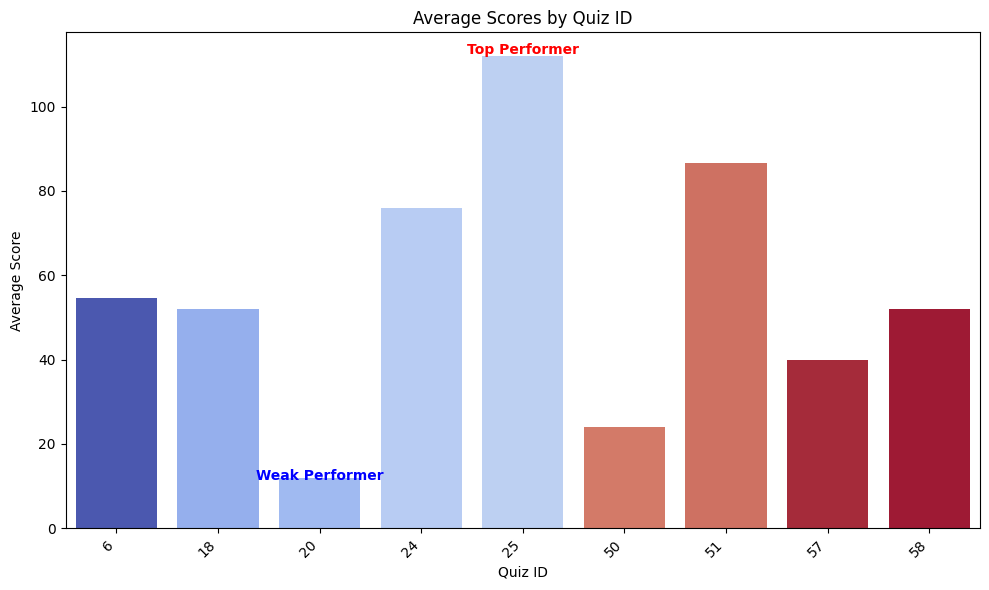

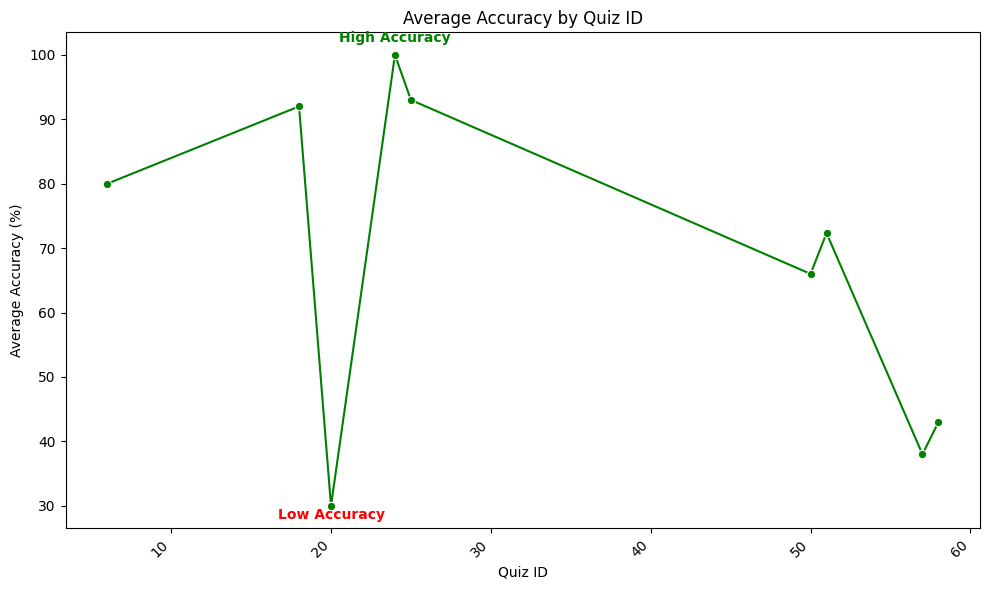

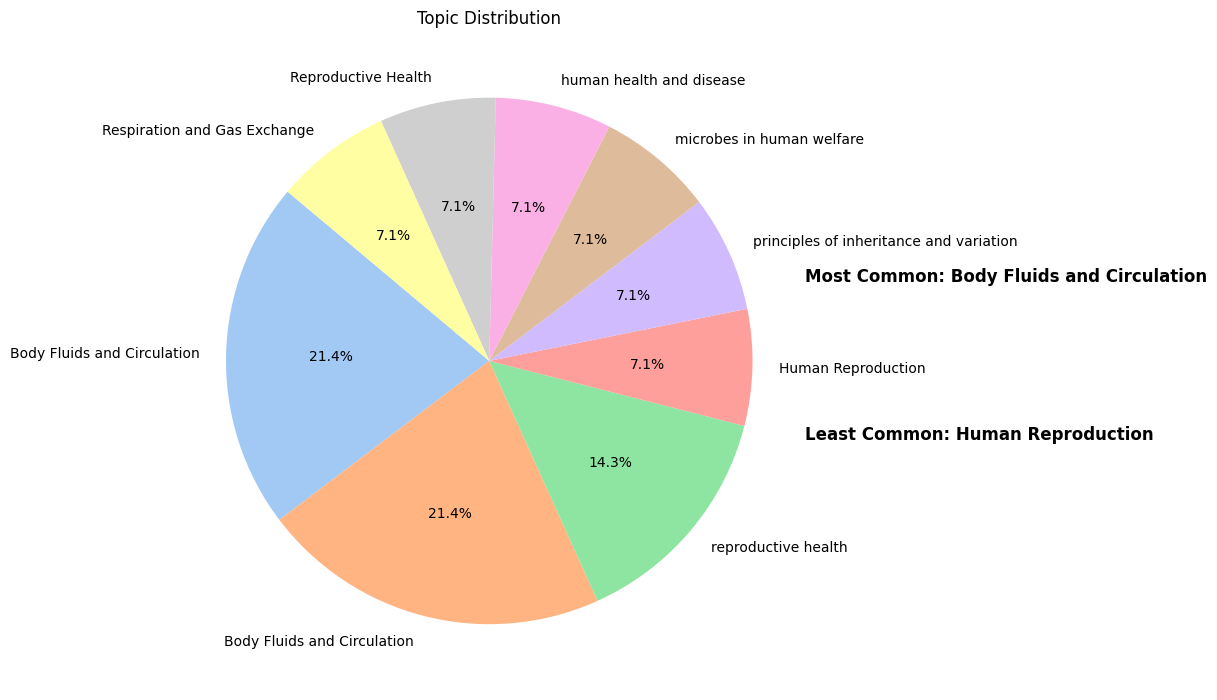

In [457]:
warnings.simplefilter(action='ignore', category=FutureWarning)


plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=his_grouped, x='quiz_id', y='score', hue='quiz_id', palette='coolwarm', legend=False)

top_performer = his_grouped.loc[his_grouped['score'].idxmax()]
bottom_performer = his_grouped.loc[his_grouped['score'].idxmin()]

barplot.text(top_performer.name, top_performer['score'] + 0.5, 'Top Performer', color='red', ha='center', fontweight='bold')
barplot.text(bottom_performer.name, bottom_performer['score'] - 0.5, 'Weak Performer', color='blue', ha='center', fontweight='bold')

plt.title('Average Scores by Quiz ID')
plt.ylabel('Average Score')
plt.xlabel('Quiz ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=his_grouped_accuracy, x='quiz_id', y='accuracy', marker='o', color='green')

high_accuracy = his_grouped_accuracy.loc[his_grouped_accuracy['accuracy'].idxmax()]
low_accuracy = his_grouped_accuracy.loc[his_grouped_accuracy['accuracy'].idxmin()]

lineplot.text(high_accuracy['quiz_id'], high_accuracy['accuracy'] + 2, 'High Accuracy', color='green', ha='center', fontweight='bold')
lineplot.text(low_accuracy['quiz_id'], low_accuracy['accuracy'] - 2, 'Low Accuracy', color='red', ha='center', fontweight='bold')
plt.title('Average Accuracy by Quiz ID')
plt.ylabel('Average Accuracy (%)')
plt.xlabel('Quiz ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 12))
topic_pie = plt.pie(topic_count, labels=topic_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

most_common_topic = topic_count.idxmax()
least_common_topic = topic_count.idxmin()

plt.text(1.2, 0.3, f'Most Common: {most_common_topic}', color='black', fontsize=12, ha='left', fontweight = 'bold')
plt.text(1.2, -0.3, f'Least Common: {least_common_topic}', color='black', fontsize=12, ha='left', fontweight = 'bold')

plt.title('Topic Distribution')
plt.tight_layout()
plt.show()

In [436]:
weak_topics = topic_performance[topic_performance['accuracy'] < 50]
print("Weak Topics:\n", weak_topics)

Weak Topics:
                                       topic  score  accuracy  negative_score
2                        Human Reproduction   40.0      38.0            16.0
3                       Reproductive Health   52.0      43.0            17.0
7  principles of inheritance and variation    12.0      30.0             7.0


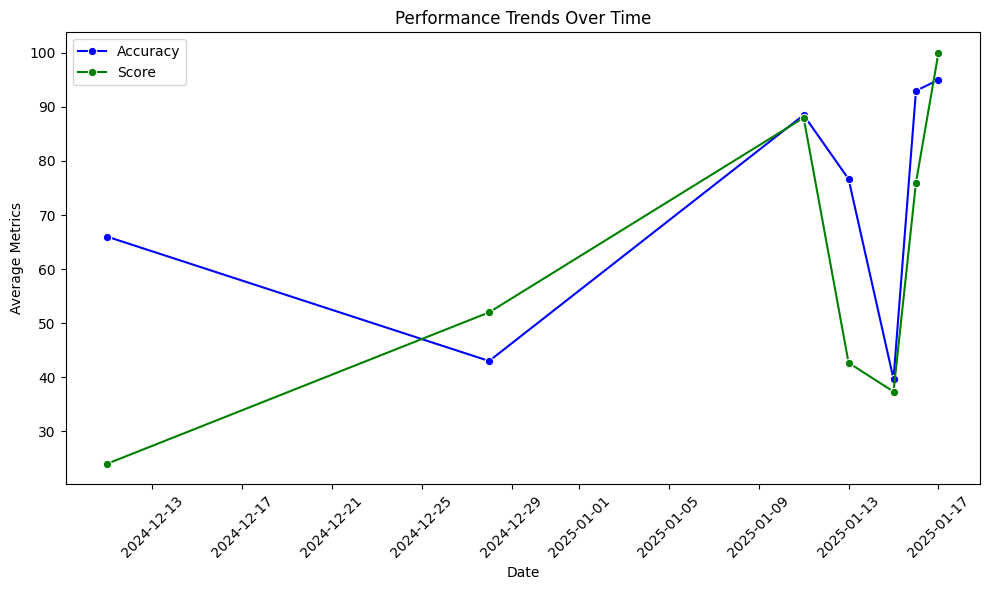

In [437]:
trend_data = His_data.groupby('submitted_date').agg({
    'accuracy': 'mean',
    'score': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='submitted_date', y='accuracy', marker='o', label='Accuracy', color='blue')
sns.lineplot(data=trend_data, x='submitted_date', y='score', marker='o', label='Score', color='green')
plt.title('Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [438]:
def generate_recommendations(weak_topics):
    recommendations = []
    for _, row in weak_topics.iterrows():
        recommendations.append(f"Focus on the topic '{row['topic']}' to improve accuracy.")
    return recommendations

recommendations = generate_recommendations(weak_topics)
print("\nActionable Recommendations:")
for rec in recommendations:
    print(rec)



Actionable Recommendations:
Focus on the topic 'Human Reproduction' to improve accuracy.
Focus on the topic 'Reproductive Health' to improve accuracy.
Focus on the topic 'principles of inheritance and variation ' to improve accuracy.


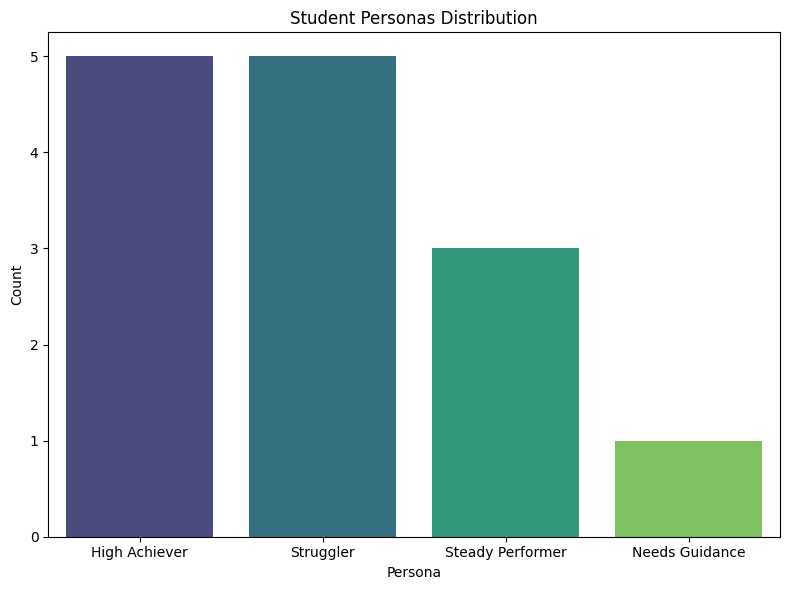

Student Personas:
                          user_id           persona
0   YcDFSO4ZukTJnnFMgRNVwZTE4j42  Steady Performer
1   YcDFSO4ZukTJnnFMgRNVwZTE4j42     High Achiever
4   YcDFSO4ZukTJnnFMgRNVwZTE4j42         Struggler
13  YcDFSO4ZukTJnnFMgRNVwZTE4j42    Needs Guidance


In [439]:
def assign_persona(row):
    if row['accuracy'] > 90:
        return "High Achiever"
    elif row['accuracy'] > 70:
        return "Steady Performer"
    elif row['accuracy'] > 50:
        return "Needs Guidance"
    else:
        return "Struggler"


His_data['persona'] = His_data.apply(assign_persona, axis=1)
persona_counts = His_data['persona'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=persona_counts.index, y=persona_counts.values, palette='viridis')
plt.title('Student Personas Distribution')
plt.xlabel('Persona')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Student Personas:\n", His_data[['user_id', 'persona']].drop_duplicates())